In [1]:
import pandas as pd
import numpy as np
import openpyxl 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
#### LOAD DATA ####
data = pd.read_csv(r'C:\Users\JustC\Desktop\Programming\DataScience\CovidReport\COVID-19-master\CovidReportv2\coronaCases.csv', sep=',')
data = data[['date','cases']]
print('-'*30);print('HEAD');print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   date  cases
0     1     27
1     2     27
2     3     27
3     4     44
4     5     44


------------------------------
PREPARE DATA
------------------------------


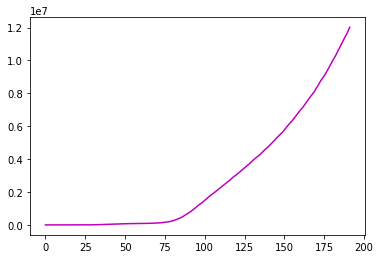

In [3]:
#### PREPARE DATA ####
print('-'*30);print('PREPARE DATA');print('-'*30)
x = np.array(data['date']).reshape(-1, 1)
y = np.array(data['cases']).reshape(-1, 1)
plt.plot(y,'-m')
#plt.show()
polyFeat = PolynomialFeatures(degree=3)

x = polyFeat.fit_transform(x)
#print(x)

In [4]:
#### TRAINING DATA ####
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)

------------------------------
TRAINING DATA
------------------------------
Accuracy:99.8 %


In [5]:
#### PREDICTION ####
days = 75
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction – Cases after {days} days:',end='')
print(round(int(model.predict(polyFeat.fit_transform([[192+days]])))/1000000,2),'Million')

------------------------------
PREDICTION
------------------------------
Prediction – Cases after 75 days:30.34 Million


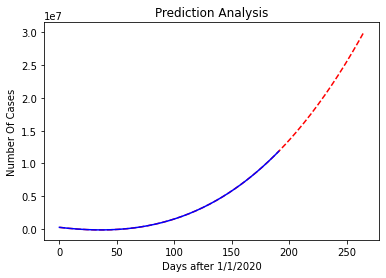

In [6]:
x1 = np.array(list(range(1,192+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.title("Prediction Analysis")
plt.plot(y1,'r', linestyle='dashed')
plt.plot(y0,'b')
plt.xlabel("Days after 1/1/2020")
plt.ylabel("Number Of Cases")
plt.show()